In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
import scipy as sp
from joblib import dump, load
import statsmodels.formula.api as smf
import numpy as np

In [2]:
# Задача. Хотим узнать, какая связь между каждым каналом рекламы (ТВ, радио, газеты) и продажами

In [3]:
df = pd.read_csv('Advertising.csv')
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


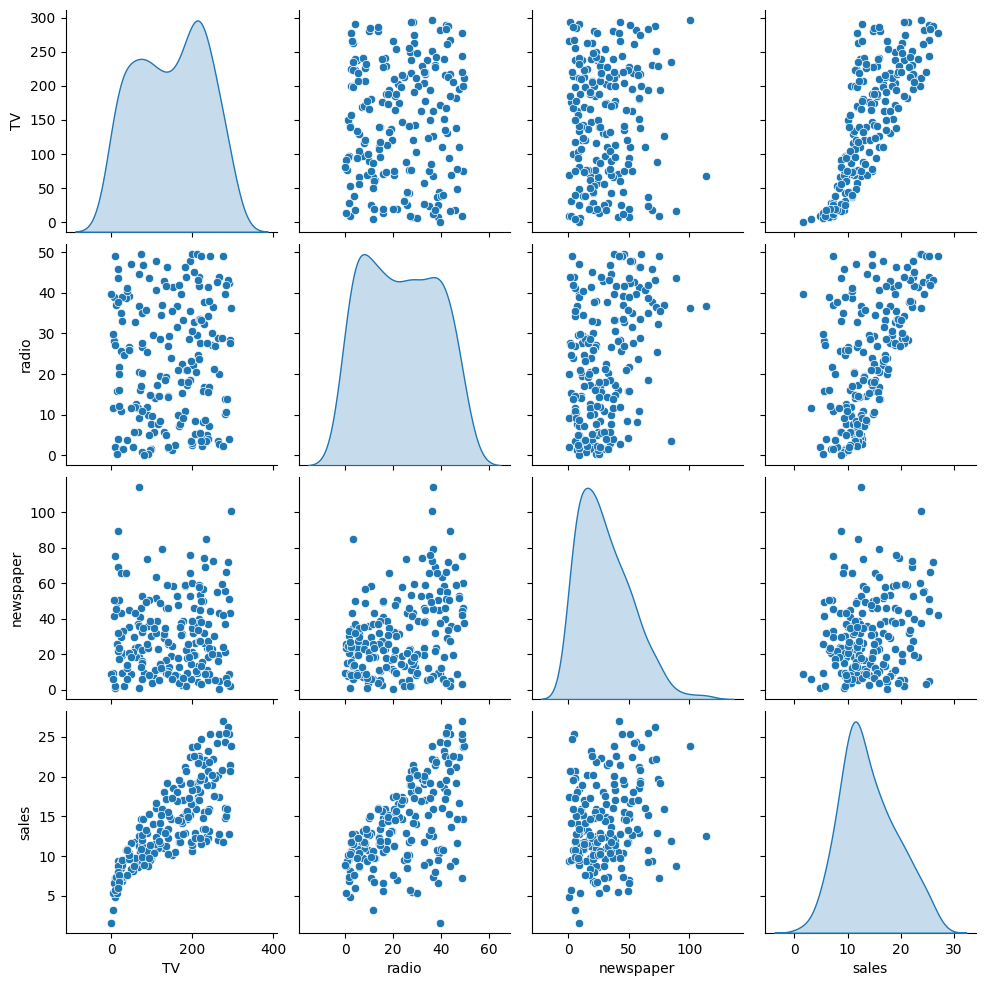

In [4]:
# Связи между признаками
sns.pairplot(df,diag_kind='kde');

In [5]:
Y = df['sales'] # зависимая переменная 

In [6]:
X = df.drop('sales', axis=1) # предикторы

In [7]:
# train_test_split() - разделение массива данных на тестовую группу и тренировачную
# LinearRegression - класс, в котором реализован градиентный спуск
# Градиентный спуск - векторизация метода наименьших квадратов на функции потерь 

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=42)
# random_state - воспроизведение результатов
# test_size - размер выборки

In [9]:
len(df)

200

In [10]:
len(X_test) # доказательство того, что test_size=0.3

60

In [11]:
model = LinearRegression()

In [12]:
model.fit(X_train, Y_train) # обучили модель для предсказания

LinearRegression()

In [13]:
len(Y_train)

140

In [14]:
Y_new = model.predict(X_test)
len(Y_new)

60

In [15]:
len(Y_test)
len(X_test)

60

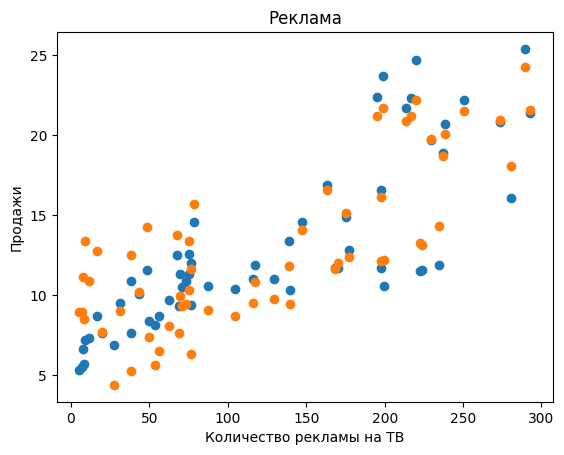

In [16]:
# Сравнение тестовой группы и обученной модели
# Канал ТВ
plt.title('Реклама')
plt.ylabel('Продажи')
plt.xlabel('Количество рекламы на ТВ')
plt.scatter(X_test['TV'], Y_test)
plt.scatter(X_test['TV'], Y_new);

In [17]:
# Оценка модели по мерам изменчивости

### Метрики

Для регрессионных задач наиболее часто используются следующие три метрики:

**Средняя абсолютная ошибка - Mean Absolute Error** (MAE) - усредняет абсолютные значения ошибок:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Среднеквадратическая ошибка - Mean Squared Error** (MSE) - усредняет квадраты ошибок:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Среднеквадратическое отклонение - Root Mean Squared Error** (RMSE) - квадратный корень от среднеквадратической ошибки:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Сравнение метрик:

- **MAE** проще всего понять - это просто средняя ошибка.
- **MSE** более популярнее MAE, потому что MSE больше "наказывает" большие ошибки, и обычно это более полезно в прикладных задачах.
- **RMSE** даже ещё более популярна, чем MSE, потому что RMSE измеряется в тех же единицах, что и "y".

Все эти метрики являются **функциями потери (loss functions)**, потому что мы стремимся уменьшить их.

In [18]:
df['sales'].mean()

np.float64(14.0225)

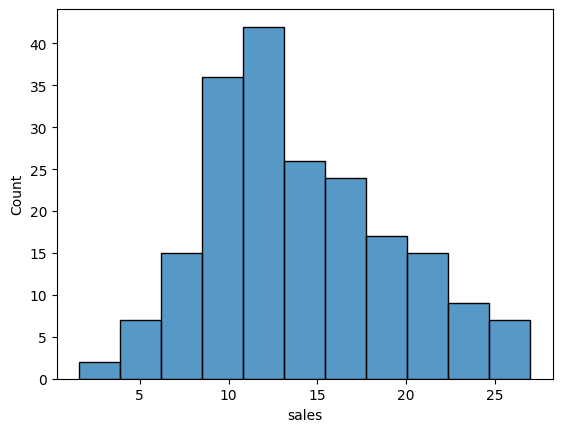

In [19]:
sns.histplot(data = df, x = 'sales'); # так можем узнать частоту продаж по определенной цене

In [20]:
# понятная метрика
mean_absolute_error(Y_test, Y_new) # сначала пишем значение тестовые, затем предсказанные
# за Y отвечает df['sales'], поэтому данную ошибку можно сравнивать со средним значением

1.5116692224549086

In [21]:
# ошибка составляет примерно 11 процентов
mean_absolute_error(Y_test, Y_new)/df['sales'].mean()*100
# принимаем ли это или нет зависит уже от конкретной задачи

np.float64(10.780311802138767)

In [22]:
mean_squared_error(Y_test, Y_new)**(1/2) # ошибка выше относительно другой метрики

1.9485372043446387

In [23]:
mean_squared_error(Y_test, Y_new)**(1/2)/df['sales'].mean()*100
# 14 процентов говорит,что в некоторых точках модель сильно ошибается

np.float64(13.8957903679418)

## Остатки (Residuals)

Квартет Энскомба: [ссылка на википедию](https://ru.wikipedia.org/wiki/%D0%9A%D0%B2%D0%B0%D1%80%D1%82%D0%B5%D1%82_%D0%AD%D0%BD%D1%81%D0%BA%D0%BE%D0%BC%D0%B1%D0%B0).

Первый пример - сохранение линейности. Второй - нет!

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/ec/Anscombe%27s_quartet_3.svg/850px-Anscombe%27s_quartet_3.svg.png">

In [24]:
# Анализ остатков
test_residuals = Y_test - Y_new

In [25]:
# коэффициенты для построения линейной регрессии
model.coef_
model.intercept_

np.float64(2.7089490925159065)

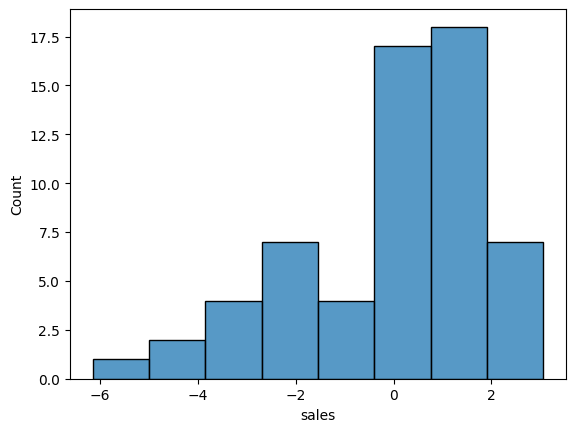

In [26]:
sns.histplot(x=test_residuals);

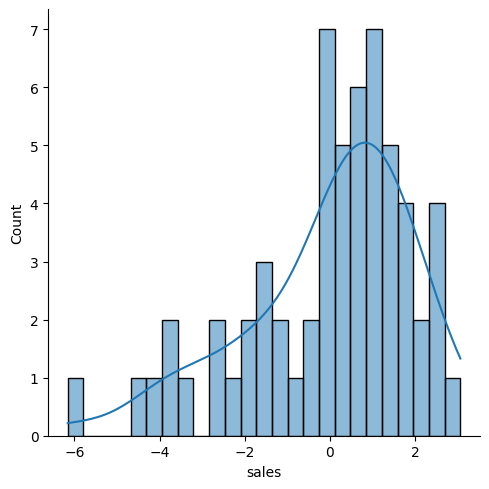

In [27]:
# оценка плотности вероятности случайной величины
sns.displot(test_residuals, bins=25, kde = True); # разница в данных по сравнение с верхей гистрограммой - количество интервалов bins

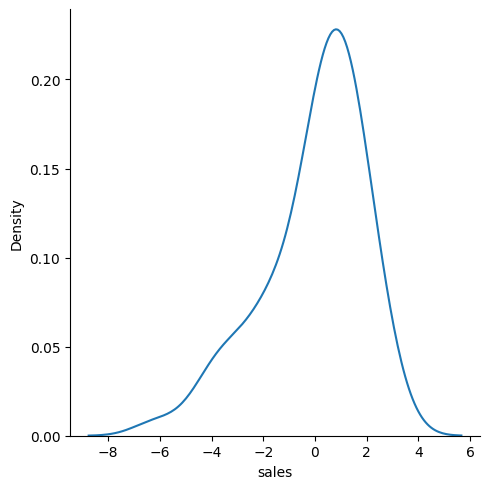

In [28]:
sns.displot(test_residuals, kind='kde'); # если хотим плотность вероятности посчитать отдельно

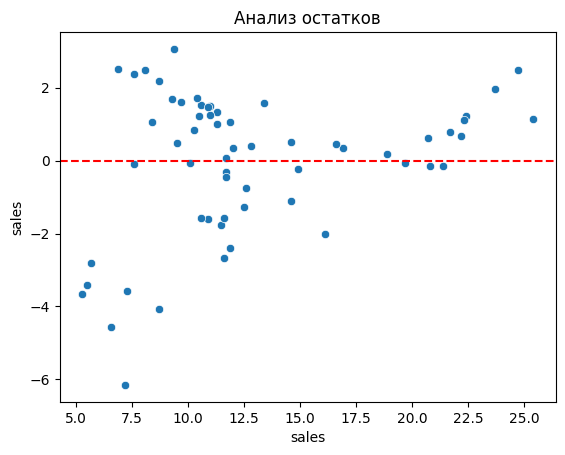

In [29]:
# Анализ остатков с помощью диаграммы рассеяния
plt.axhline(y = 0, color = 'red', ls='--')
plt.title('Анализ остатков')
sns.scatterplot(x=Y_test, y = test_residuals);

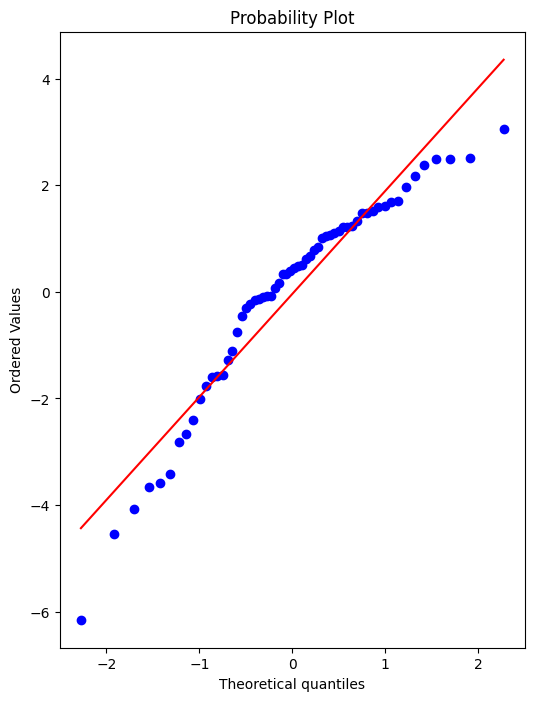

In [30]:
# probplot аналогичен qqplot. Проверка на нормальность данных

fig, ax = plt.subplots(figsize=(6,8),dpi=100)

_ = sp.stats.probplot(test_residuals,plot=ax)

In [31]:
# Если всё по метрикам устраивает, то следующий шаг - внедреннее модели
# пока пропустили шаг по настройки модели (полиномиальная регрессия и регурялизация)

In [32]:
# Тогда применяем линейную регрессию
final_model = LinearRegression()
final_model.fit(X,Y) # теперь обучаем модель на всех данных

LinearRegression()

In [33]:
final_model.coef_
# модели кажется, что затраты на рекламу никак не влияют на количество купленых газет

array([ 0.04576465,  0.18853002, -0.00103749])

In [34]:
X.head()

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [35]:
dump(final_model, 'final_sales_model.joblib') # сохраняем эту модель для передачи данных
# loaded_model = load('final_sales_model.joblib') # выгрузка данных

['final_sales_model.joblib']

In [ ]:
# Построение линейной регрессии 
# загружаем данные
url = 'https://raw.githubusercontent.com/razority/R_data/main/Exam.xlsx'
exam = pd.read_excel(url)
exam['school'] = exam['school'].astype(str)

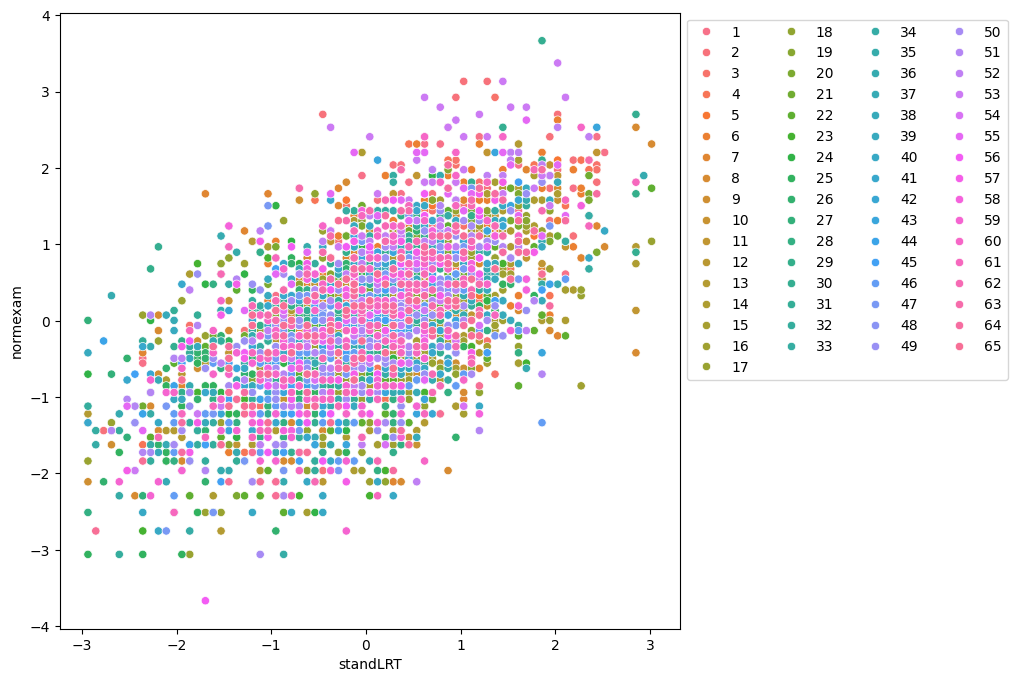

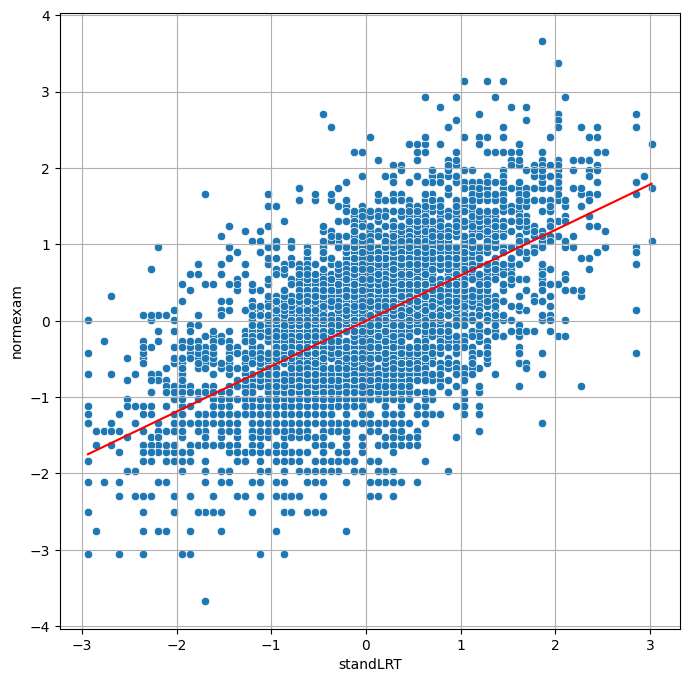

In [53]:
# рисуем диаграмму рассеяния 
fig, ax = plt.subplots(figsize=(8,8))
g = sns.scatterplot(x='standLRT', y='normexam', hue='school', data=exam) # диаграммма рассеяния
# немного надо трансформировать легенду
h,l = g.get_legend_handles_labels()
g.legend(h,l, ncol=4, bbox_to_anchor=(1, 1), loc=2)

# исследуем модель
model = smf.ols('normexam ~ standLRT', data=exam).fit()
#display(model.summary())

# линейная регрессия
plt.figure(figsize=(8,8))
x = np.array(exam.loc[:,'standLRT'])
y = np.array(exam.loc[:,'normexam'])

sns.scatterplot(x='standLRT', y='normexam', data=exam)
b1, b0 = np.polyfit(x, y, 1) #  b0 - intercept, b1 - slope. Фитируем данные линейной функцией
sns.lineplot(x = x, y = b0 + b1*x, color='red')
plt.grid()

<class 'statsmodels.iolib.summary2.Summary'>
"""
         Mixed Linear Model Regression Results
========================================================
Model:            MixedLM Dependent Variable: normexam  
No. Observations: 4059    Method:             REML      
No. Groups:       65      Scale:              0.5659    
Min. group size:  2       Log-Likelihood:     -4684.3826
Max. group size:  198     Converged:          Yes       
Mean group size:  62.4                                  
---------------------------------------------------------
           Coef.  Std.Err.    z     P>|z|  [0.025  0.975]
---------------------------------------------------------
Intercept  0.002     0.040   0.058  0.954  -0.077   0.081
standLRT   0.563     0.012  45.106  0.000   0.539   0.588
Group Var  0.094     0.025                               
========================================================

"""

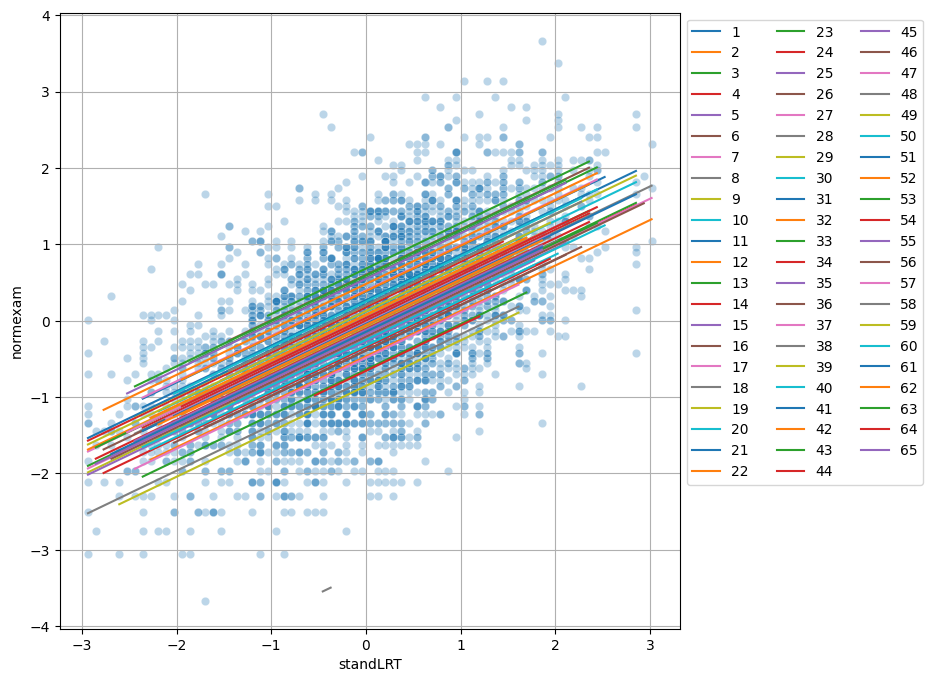

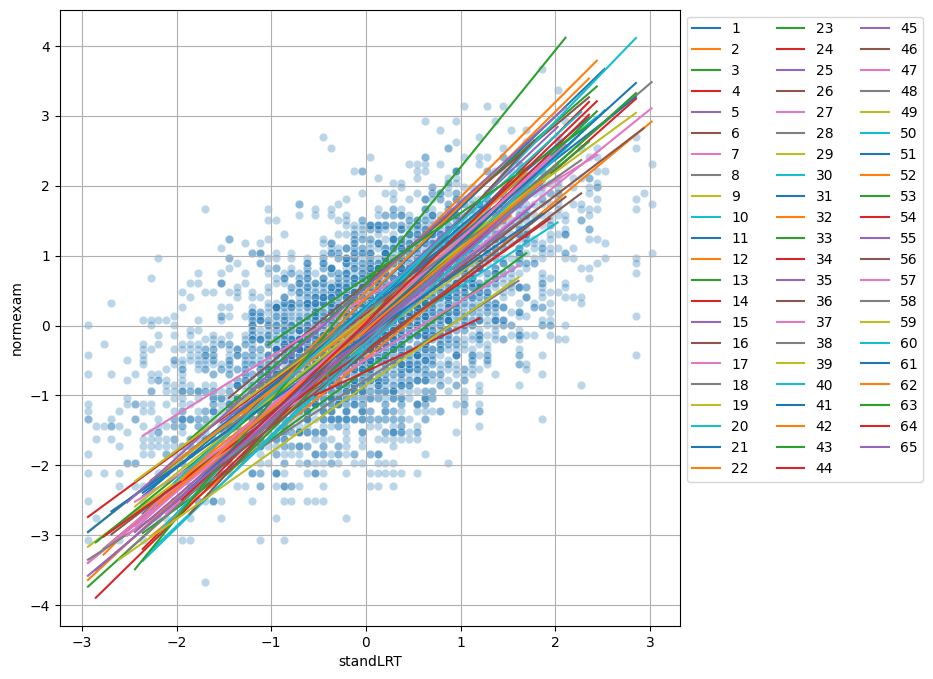

In [88]:
# Смешанная регрессия при случайном эффекте school
# Учитывается свободное слагаемое
vc = 'normexam ~ standLRT'
model2 = smf.mixedlm(vc, data=exam, groups=exam['school']).fit() 
display(model2.summary()) # REML - метод максимального правдободобия

plt.figure(figsize=(8,8))
X22 = np.array(exam['standLRT'])
y22 = np.array(exam['normexam'])

sns.scatterplot(x='standLRT', y='normexam', data=exam, alpha = .3)

# задаём только intercept для каждой школы
ar_b00 = []
for school in exam['school'].unique():
    X2 = np.array(exam[exam['school'] == school].loc[:,'standLRT'])
    y2 = np.array(exam[exam['school'] == school].loc[:,'normexam'])
    b01, b00 = np.polyfit(X2, y2, 1) #  b00 - intercept for school , b01 - slope for school

    sns.lineplot(x=X2, y=b00 + b1*X2 + b0, legend = 'full', label = school)
    
plt.legend(ncol=3, bbox_to_anchor=(1., 1.))
plt.grid()

# задаём и коэф. наклона и пересечение с осью

plt.figure(figsize=(8,8))
sns.scatterplot(x='standLRT', y='normexam', data=exam, alpha = .3)

for school in exam['school'].unique():
    X2 = np.array(exam[exam['school'] == school].loc[:,'standLRT'])
    y2 = np.array(exam[exam['school'] == school].loc[:,'normexam'])
    b01, b00 = np.polyfit(X2, y2, 1) #  b00 - intercept for school , b01 - slope for school

    sns.lineplot(x=X2, y=b01*X2 + b1*X2 + b0 + b00, legend = 'full', label = school) # по сути это ручной способ моделирования
    
plt.legend(ncol=3, bbox_to_anchor=(1., 1.))
plt.grid()
 
 

In [ ]:
# предсказанные значение y для смешанной регрессии
y_new = model2.predict()

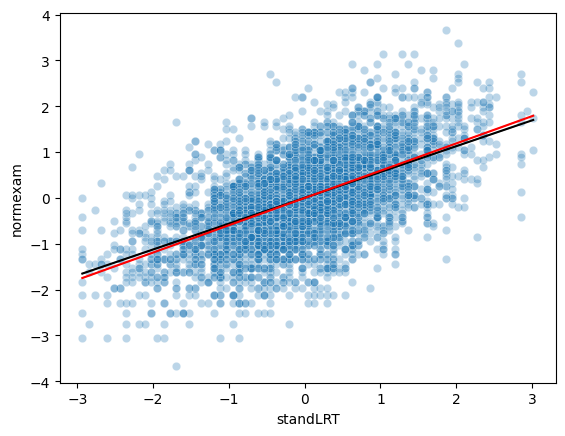

In [93]:
# Сравнение двух разных методов
# Красная линия - метод наименьших квадратов. Черная - метод максимального правдоподобия
sns.scatterplot(x='standLRT', y='normexam', data=exam, alpha = .3)
sns.lineplot(x=exam['standLRT'], y = y_new, color = 'black')
sns.lineplot(x = x, y = b0 + b1*x, color='red');